# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with the `fuel_econ.csv` dataset.

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

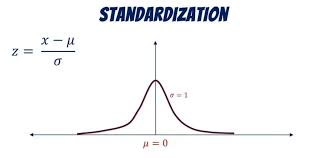


In [1]:
import kagglehub
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("malaiarasugraj/global-health-statistics")
print("Path to dataset files:", path)

# Step 1: Load the dataset
# First, let's find the CSV file in the downloaded path

Path to dataset files: C:\Users\RAISSA\.cache\kagglehub\datasets\malaiarasugraj\global-health-statistics\versions\1


In [2]:

import os
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
print("Available CSV files:", csv_files)

# Load the main dataset (assuming the first CSV file)
df = pd.read_csv(os.path.join(path, csv_files[0]))
print("Original dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

# Step 2: Handle missing values by dropping them
print("\nMissing values per column:")
print(df.isnull().sum())

# Drop rows with any missing values
df_clean = df.dropna()
print(f"\nDataset shape after dropping missing values: {df_clean.shape}")

# Step 3: Select only numeric columns for PCA
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns
df_numeric = df_clean[numeric_columns]
print(f"\nNumeric columns for PCA: {list(numeric_columns)}")
print(f"Shape of numeric data: {df_numeric.shape}")

# Step 4: Convert to numpy array and standardize using only numpy
data_array = df_numeric.values

# Calculate mean and standard deviation using numpy only
data_mean = np.mean(data_array, axis=0)
data_std = np.std(data_array, axis=0, ddof=1)  # Using sample standard deviation

# Standardize the data: (Data - Mean) / Standard Deviation
standardized_data = (data_array - data_mean) / data_std

print("\nStandardization completed!")
print("Standardized data shape:", standardized_data.shape)
print("\nFirst 5 rows of standardized data:")
print(standardized_data[:5])

# Verify standardization (mean should be ~0, std should be ~1)
print("\nVerification:")
print("Mean of standardized data (should be ~0):")
print(np.mean(standardized_data, axis=0))
print("\nStandard deviation of standardized data (should be ~1):")
print(np.std(standardized_data, axis=0, ddof=1))

# Create an alias for the cleaned dataset
health_data_clean = df_clean
print(f"\nAlias 'health_data_clean' created for the cleaned dataset with shape: {health_data_clean.shape}")

Available CSV files: ['Global Health Statistics.csv']
Original dataset shape: (1000000, 22)

First few rows:
     Country  Year         Disease Name Disease Category  Prevalence Rate (%)  \
0      Italy  2013              Malaria      Respiratory                 0.95   
1     France  2002                Ebola        Parasitic                12.46   
2     Turkey  2015             COVID-19          Genetic                 0.91   
3  Indonesia  2011  Parkinson's Disease       Autoimmune                 4.68   
4      Italy  2013         Tuberculosis          Genetic                 0.83   

   Incidence Rate (%)  Mortality Rate (%) Age Group Gender  \
0                1.55                8.42      0-18   Male   
1                8.63                8.75       61+   Male   
2                2.35                6.22     36-60   Male   
3                6.29                3.99      0-18  Other   
4               13.59                7.01       61+   Male   

   Population Affected  ...  Ho

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [3]:

# Step 3: Calculate the Covariance Matrix
# Using numpy only - formula: (X^T * X) / (n-1) where X is standardized data
n_samples = standardized_data.shape[0]
cov_matrix = np.dot(standardized_data.T, standardized_data) / (n_samples - 1)

print("Covariance Matrix:")
print(cov_matrix)
print(f"\nCovariance matrix shape: {cov_matrix.shape}")

# Alternative method using numpy's cov function for verification
# cov_matrix_verify = np.cov(standardized_data.T)
# print("\nVerification using np.cov():")
# print(np.allclose(cov_matrix, cov_matrix_verify))

Covariance Matrix:
[[ 1.00000000e+00 -8.18146814e-04 -9.43831574e-04  4.47732280e-04
   6.85555639e-04 -1.29107005e-03 -2.69957121e-05 -6.45410979e-04
   1.27541207e-03 -2.73285423e-04  8.16399298e-04 -1.22303608e-03
   2.05597103e-04 -6.09702066e-04  2.01804947e-04]
 [-8.18146814e-04  1.00000000e+00  3.38152327e-04  1.28380365e-03
   6.21521822e-04 -2.30922906e-04  4.18161619e-04  4.68351541e-04
  -1.12815047e-03 -2.01289881e-04  5.35383695e-04  3.68681387e-05
   1.04865358e-03 -1.85132760e-04  2.33371736e-03]
 [-9.43831574e-04  3.38152327e-04  1.00000000e+00  3.23081057e-04
   2.33682182e-03  8.44233680e-04 -3.72094073e-05 -3.39573503e-04
   3.90055912e-04  1.76152962e-04  3.65583883e-04 -1.03136462e-03
   1.18423584e-03 -4.81102575e-04  4.31354273e-04]
 [ 4.47732280e-04  1.28380365e-03  3.23081057e-04  1.00000000e+00
  -1.83059346e-03  7.72026512e-05  8.20286648e-04  7.69349081e-04
  -1.55351894e-03  7.36142248e-04 -1.09511758e-03  1.97414373e-04
  -1.50335631e-03 -1.10255215e-04  1

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [4]:

# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:")
print(eigenvalues)
print(f"\nNumber of eigenvalues: {len(eigenvalues)}")

print("\nEigenvectors:")
print(eigenvectors)
print(f"\nEigenvectors shape: {eigenvectors.shape}")

# Sort eigenvalues and eigenvectors in descending order
# (Important for PCA - we want components with highest variance first)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print("\nSorted Eigenvalues (descending order):")
print(eigenvalues)
print("\nSorted Eigenvectors (corresponding to sorted eigenvalues):")
print(eigenvectors)

Eigenvalues:
[0.99372264 0.99549535 0.99584893 0.99654958 1.00572007 0.99813485
 0.99895403 0.998861   1.00422898 1.00358339 1.00291236 1.00089882
 1.00126463 1.00179514 1.00203024]

Number of eigenvalues: 15

Eigenvectors:
[[ 2.91465677e-01  3.16370402e-02 -1.09762744e-01  3.99346193e-01
  -8.55693206e-02 -1.03656881e-01 -2.74162276e-01  6.73570186e-02
  -8.75303750e-02 -3.07717985e-01  2.45234209e-01 -2.88352862e-01
   5.10347943e-01  3.71695681e-01 -2.23834274e-02]
 [ 2.63862084e-01 -3.46073600e-01  9.26958180e-02 -1.58136984e-03
   1.67860841e-01 -4.42960968e-01  3.08948366e-01  1.62467931e-01
   1.93174234e-01  4.96506578e-01  5.32038471e-03  6.61128892e-02
   6.55869184e-02  3.86519864e-01  1.17663546e-01]
 [ 3.47231926e-01  7.80240805e-02  2.65297563e-02  1.11875074e-01
  -1.92793204e-01  3.11825285e-01  1.69195201e-01 -5.28616277e-01
   4.30046542e-03  4.81420564e-01  2.01194263e-01 -2.34253569e-01
   1.56193572e-01 -2.57036698e-01  7.31741494e-03]
 [-4.18032963e-01 -7.77370959

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [5]:

# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Sort eigenvectors accordingly

print("Sorted indices:")
print(sorted_indices)

print("\nSorted eigenvalues (descending order):")
print(eigenvalues[sorted_indices])

print("\nSorted eigenvectors:")
print(sorted_eigenvectors)
print(f"\nSorted eigenvectors shape: {sorted_eigenvectors.shape}")

# Each column of sorted_eigenvectors is a principal component
print(f"\nFirst principal component (explains most variance):")
print(sorted_eigenvectors[:, 0])
print(f"\nSecond principal component:")
print(sorted_eigenvectors[:, 1])

Sorted indices:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]

Sorted eigenvalues (descending order):
[1.00572007 1.00422898 1.00358339 1.00291236 1.00203024 1.00179514
 1.00126463 1.00089882 0.99895403 0.998861   0.99813485 0.99654958
 0.99584893 0.99549535 0.99372264]

Sorted eigenvectors:
[[-8.55693206e-02 -8.75303750e-02 -3.07717985e-01  2.45234209e-01
  -2.23834274e-02  3.71695681e-01  5.10347943e-01 -2.88352862e-01
  -2.74162276e-01  6.73570186e-02 -1.03656881e-01  3.99346193e-01
  -1.09762744e-01  3.16370402e-02  2.91465677e-01]
 [ 1.67860841e-01  1.93174234e-01  4.96506578e-01  5.32038471e-03
   1.17663546e-01  3.86519864e-01  6.55869184e-02  6.61128892e-02
   3.08948366e-01  1.62467931e-01 -4.42960968e-01 -1.58136984e-03
   9.26958180e-02 -3.46073600e-01  2.63862084e-01]
 [-1.92793204e-01  4.30046542e-03  4.81420564e-01  2.01194263e-01
   7.31741494e-03 -2.57036698e-01  1.56193572e-01 -2.34253569e-01
   1.69195201e-01 -5.28616277e-01  3.11825285e-01  1.11875074e-01
   2.65297

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [6]:

# Step 6: Project Data onto Principal Components

# First, let's analyze the explained variance to decide on number of components
explained_variance = eigenvalues[sorted_indices]
explained_variance_ratio = explained_variance / np.sum(explained_variance)
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Explained variance ratio by component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

print("\nCumulative explained variance:")
for i, cum_var in enumerate(cumulative_variance):
    print(f"First {i+1} components: {cum_var:.4f} ({cum_var*100:.2f}%)")

# Decide on number of components (e.g., keep components that explain 95% of variance)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of components to keep 95% variance: {num_components}")

# Alternative: You can also manually set the number of components
# num_components = 2  # For example, keep first 2 components

# Select the first 'num_components' principal components
selected_components = sorted_eigenvectors[:, :num_components]
print(f"\nSelected components shape: {selected_components.shape}")

# Project data onto the principal components
# Formula: reduced_data = standardized_data * selected_components
reduced_data = np.dot(standardized_data, selected_components)

print(f"\nReduced data shape: {reduced_data.shape}")
print("\nFirst 5 rows of reduced data:")
print(reduced_data[:5])

# Show the dimensionality reduction
print(f"\nDimensionality reduction:")
print(f"Original dimensions: {standardized_data.shape[1]}")
print(f"Reduced dimensions: {reduced_data.shape[1]}")
print(f"Variance retained: {cumulative_variance[num_components-1]*100:.2f}%")

Explained variance ratio by component:
PC1: 0.0670 (6.70%)
PC2: 0.0669 (6.69%)
PC3: 0.0669 (6.69%)
PC4: 0.0669 (6.69%)
PC5: 0.0668 (6.68%)
PC6: 0.0668 (6.68%)
PC7: 0.0668 (6.68%)
PC8: 0.0667 (6.67%)
PC9: 0.0666 (6.66%)
PC10: 0.0666 (6.66%)
PC11: 0.0665 (6.65%)
PC12: 0.0664 (6.64%)
PC13: 0.0664 (6.64%)
PC14: 0.0664 (6.64%)
PC15: 0.0662 (6.62%)

Cumulative explained variance:
First 1 components: 0.0670 (6.70%)
First 2 components: 0.1340 (13.40%)
First 3 components: 0.2009 (20.09%)
First 4 components: 0.2678 (26.78%)
First 5 components: 0.3346 (33.46%)
First 6 components: 0.4014 (40.14%)
First 7 components: 0.4681 (46.81%)
First 8 components: 0.5348 (53.48%)
First 9 components: 0.6014 (60.14%)
First 10 components: 0.6680 (66.80%)
First 11 components: 0.7346 (73.46%)
First 12 components: 0.8010 (80.10%)
First 13 components: 0.8674 (86.74%)
First 14 components: 0.9338 (93.38%)
First 15 components: 1.0000 (100.00%)

Number of components to keep 95% variance: 15

Selected components shape: (1

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [7]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
print("\nFirst 5 rows of reduced data:")
print(reduced_data[:5])  # Display the first few rows of reduced data

# Additional useful information
print(f"\nOriginal data shape: {standardized_data.shape}")
print(f"Dimensionality reduction: {standardized_data.shape[1]} → {reduced_data.shape[1]} dimensions")
print(f"Data compression ratio: {(reduced_data.shape[1] / standardized_data.shape[1]) * 100:.1f}%")
print(f"Variance retained: {cumulative_variance[num_components-1]*100:.2f}%")

Reduced Data Shape: (1000000, 15)

First 5 rows of reduced data:
[[ 0.21640354  0.25292702 -1.33160061 -1.16692134  0.04120326  0.64895526
   1.0840091   0.09942006 -0.5191321   0.17507743 -0.01562459 -1.42394183
   0.76077822  2.91320082 -1.04492018]
 [-0.74838263  0.5800967   0.94767499 -0.53864403 -0.1430886  -0.62313305
  -0.56513735  0.0072603  -0.0049367  -0.43530306 -0.22839396  0.51642021
   1.92783891 -1.22073347 -1.39806386]
 [ 0.69366068  0.89946082 -2.49964224 -0.58152824 -1.72648878 -0.27358182
   0.12520233 -0.52782568 -1.2689122  -0.19870642  0.49383856 -2.1463778
  -1.00182407 -0.57198622  0.88007299]
 [ 1.16727488 -0.92184788  0.07896146 -0.32319105 -0.01318017 -1.10298117
   0.53515677 -0.40573534  0.34755796  1.26279489  0.67638966  0.1693712
  -1.15745161  1.00487987 -0.4870461 ]
 [ 1.15128923 -1.53984394  0.10719809  0.13343108 -0.62899475 -0.33198982
   0.44892294 -0.01985653 -0.0619067  -1.86365094  1.54588909  0.30113781
  -1.65550886  0.45461298 -0.24050209]]



### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

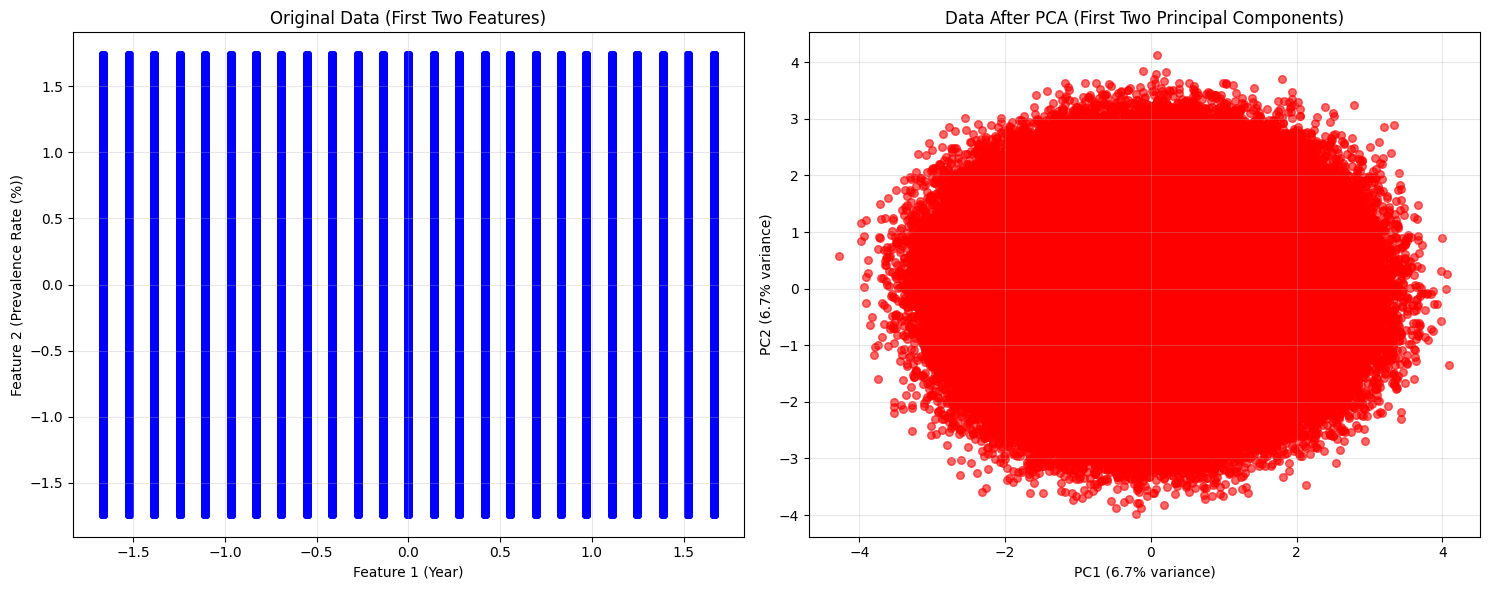

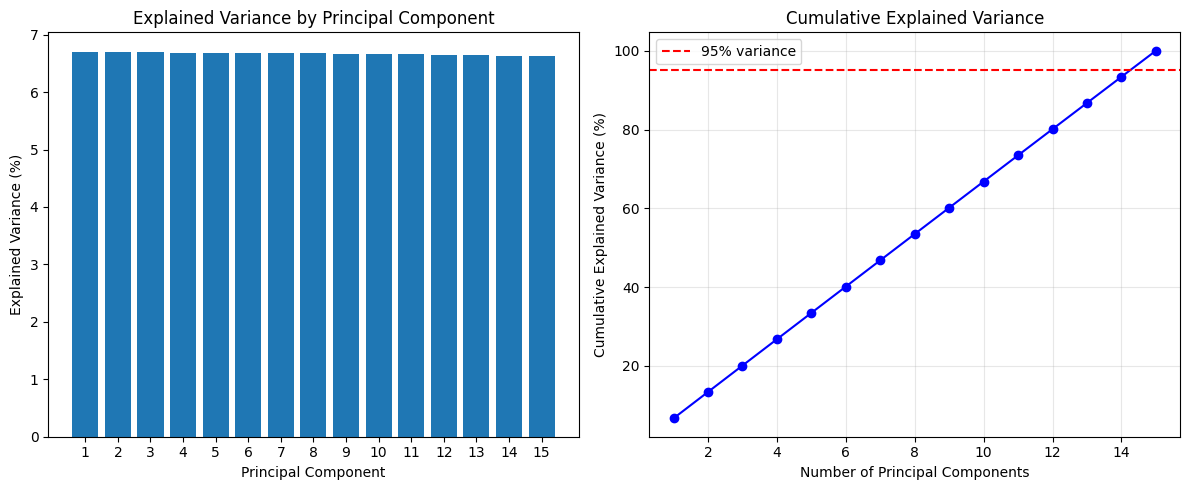


PCA Summary:
Total features in original data: 15
Number of principal components kept: 15
Variance explained by selected components: 100.00%
Dimensionality reduction: 0.0%


In [8]:

# Step 8: Visualize Before and After PCA
import matplotlib.pyplot as plt

# Create subplots for comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot original data (first two features for simplicity)
ax1.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.6, c='blue', s=30)
ax1.set_xlabel(f'Feature 1 ({numeric_columns[0]})')
ax1.set_ylabel(f'Feature 2 ({numeric_columns[1]})')
ax1.set_title('Original Data (First Two Features)')
ax1.grid(True, alpha=0.3)

# Plot reduced data after PCA (first two principal components)
if reduced_data.shape[1] >= 2:
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.6, c='red', s=30)
    ax2.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% variance)')
    ax2.set_ylabel(f'PC2 ({explained_variance_ratio[1]*100:.1f}% variance)')
    ax2.set_title('Data After PCA (First Two Principal Components)')
else:
    # If only one component, plot as histogram
    ax2.hist(reduced_data[:, 0], bins=30, alpha=0.7, color='red')
    ax2.set_xlabel(f'PC1 ({explained_variance_ratio[0]*100:.1f}% variance)')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Data After PCA (First Principal Component)')

ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional visualization: Explained variance plot
plt.figure(figsize=(12, 5))

# Subplot 1: Individual explained variance
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Explained Variance by Principal Component')
plt.xticks(range(1, len(explained_variance_ratio) + 1))

# Subplot 2: Cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, 'bo-')
plt.axhline(y=95, color='r', linestyle='--', label='95% variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nPCA Summary:")
print(f"Total features in original data: {standardized_data.shape[1]}")
print(f"Number of principal components kept: {num_components}")
print(f"Variance explained by selected components: {cumulative_variance[num_components-1]*100:.2f}%")
print(f"Dimensionality reduction: {((standardized_data.shape[1] - num_components) / standardized_data.shape[1]) * 100:.1f}%")